In [7]:
import pandas as pd
import geopandas as gp
import shapely as sp
from shapely.geometry import Point, Polygon, MultiPolygon
import numpy as np
from itertools import combinations
import intake
from shapely.geometry import MultiPoint
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
import matplotlib.cbook as cbook
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection


In [2]:
#Michael's code, gets the polygon of an obsid
def get_outer_polygon_for_obsid(obsid, return_hull=True):
    tiles = pd.read_csv("tile_coordinates.csv")
    obsid_tiles = tiles.query("obsid == @obsid")
    cols = "BodyFixedCoordinateX BodyFixedCoordinateY".split()
    coords = obsid_tiles[cols]
    coords.columns = ["x", "y"]
    mp = MultiPoint(list(zip(coords.x, coords.y)))
    if return_hull:
        return mp.convex_hull
    else:
        return mp

In [3]:
olddata = pd.read_csv("n_obj_df.csv")

In [4]:
olddata.head()

,Latitude,Ls,MY,Which,fraction,n_objects,obsid,pixel_area,region_name
0,-85.4074,214.785,29,both,0.115,933,ESP_012079_0945,2.551911e+07,Macclesfield
1,-85.4065,183.727,29,both,0.070,1971,ESP_011407_0945,2.592302e+06,Macclesfield
2,-85.4056,198.040,29,both,0.072,1525,ESP_011723_0945,8.455380e+06,Macclesfield
3,-85.4049,207.892,29,both,0.168,788,ESP_011934_0945,7.357966e+06,Macclesfield
4,-85.4067,235.282,29,both,0.111,1285,ESP_012501_0945,4.882627e+06,Macclesfield


In [21]:
olddata[olddata['region_name'] == 'Wellington'].obsid.unique()

array(['ESP_012008_0975', 'ESP_011296_0975'], dtype=object)

In [19]:
allregions = olddata.region_name.unique()
allregions

array(['Macclesfield', 'Starburst', 'Manhattan_Classic', 'Wellington',
       'Albany', 'Bilbao', 'Ithaca', 'Portsmouth', 'Pisaq',
       'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges',
       'Inca_City', 'Giza', 'Potsdam', 'Troy', 'Oswego_Edge', 'Halifax',
       'Caterpillar', 'Rochester', 'Manhattan_Cracks', 'Schenectady',
       'Binghamton', 'Atka', 'Cortland', 'Geneseo'], dtype=object)

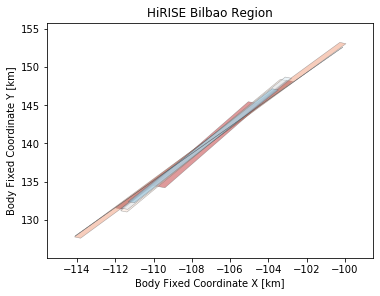

In [36]:
region = "Bilbao"
bucket = []
my29 = olddata[olddata['MY'] == 29]
for obs in my29[my29['region_name'] == region].obsid.unique():
    d = {}
    d['region_name'] = region
    d['Obsid_Used'] = obs
    x = get_outer_polygon_for_obsid(obs)
    area = x.area
    d['Obsid_Area'] = area
    d['polygon_shape'] = x
    bucket.append(d)
results = pd.DataFrame(bucket)
bucket = []
for poly in results.polygon_shape:
    bucket.append(poly)
test = MultiPolygon(bucket)
cm = plt.get_cmap('RdBu')
num_colors = len(test)
fig = plt.figure()
ax = fig.add_subplot(111)
minx, miny, maxx, maxy = test.bounds
w, h = maxx - minx, maxy - miny
ax.set_xlim(minx - 0.1 * w, maxx + 0.1 *w)
ax.set_ylim(miny -0.1 * h, maxy + 0.1 * h)
ax.set_aspect(0.4)
#test2 = cascaded_union(test)
#n = test2.area

#print(area)
#area = (n+9) // 10* 10#rounds area up to nearest 10
#area = int(area)#turns rounded number into int instead of float
#plt.title(f"HiRISE Macclesfield Region (Area ~ {area} $km.^2$)")
plt.title(f"HiRISE {region} Region")

plt.xlabel("Body Fixed Coordinate X [km]")
plt.ylabel("Body Fixed Coordinate Y [km]")

patches =[]
for idx, p in enumerate(test):
    color = cm(1.*idx/num_colors)
    patches.append(PolygonPatch(p, fc = color, ec='#555555', lw = 0.5, alpha = 0.5, zorder =1))
ax.add_collection(PatchCollection(patches, match_original = True))
fig.savefig(f"{region}_alpha_fill.pdf", bbox_inches = 'tight')

AttributeError: 'DataFrame' object has no attribute 'polygon_shape'

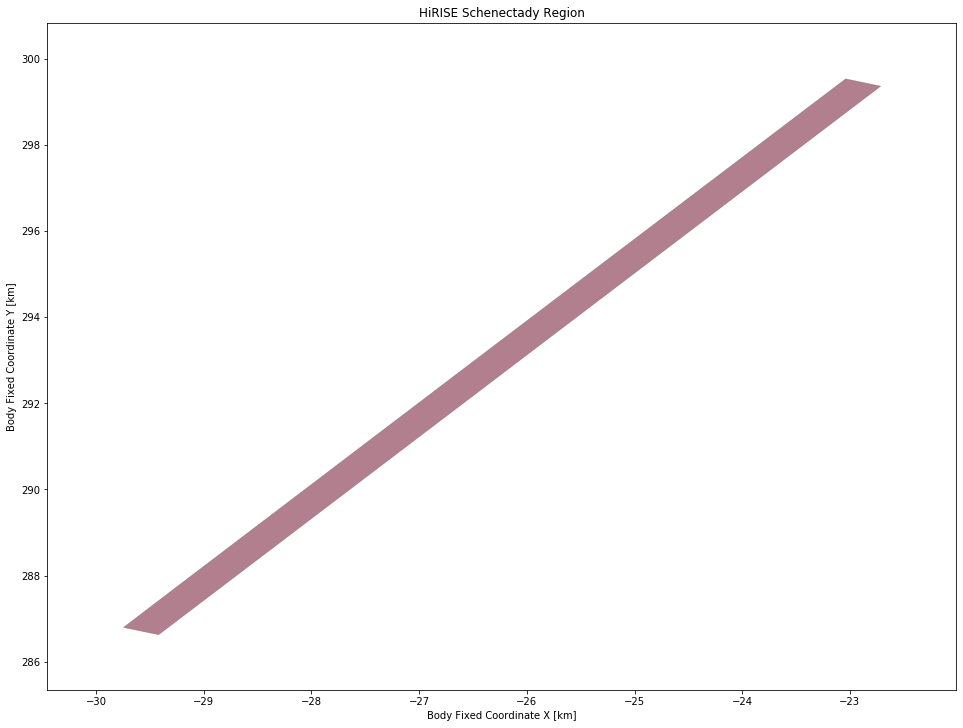

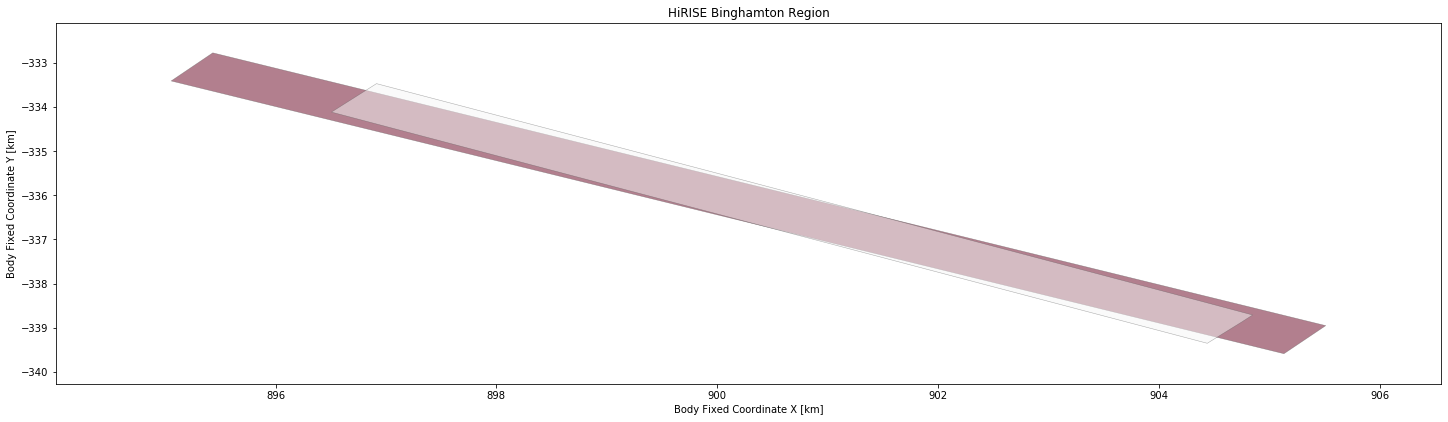

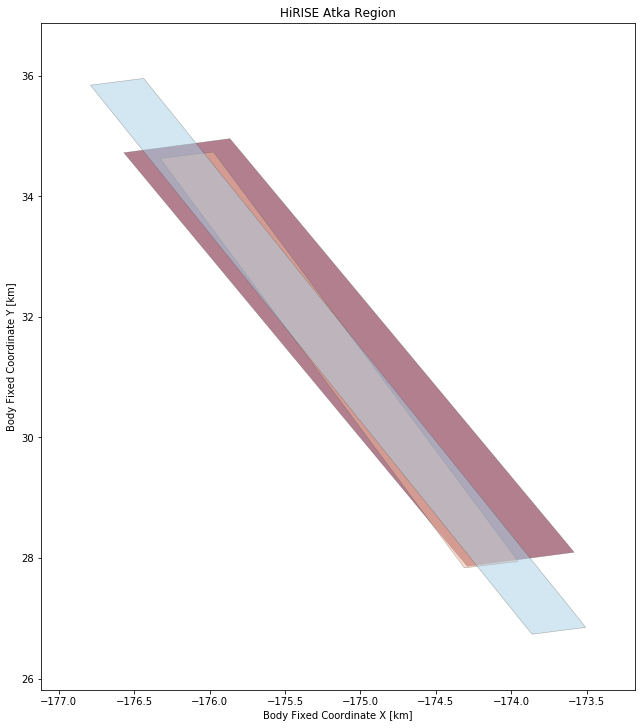

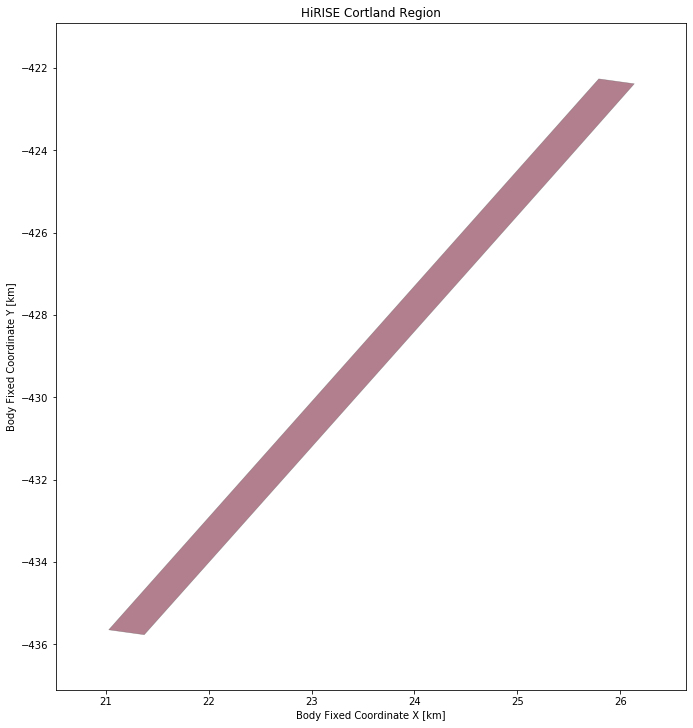

In [50]:
for region in allregions[21:]:
    bucket = []
    my29 = olddata[olddata['MY'] == 29]
    for obs in my29[my29['region_name'] == region].obsid.unique():
        d = {}
        d['region_name'] = region
        d['Obsid_Used'] = obs
        x = get_outer_polygon_for_obsid(obs)
        area = x.area
        d['Obsid_Area'] = area
        d['polygon_shape'] = x
        bucket.append(d)
    results = pd.DataFrame(bucket)
    bucket = []
    for poly in results.polygon_shape:
        bucket.append(poly)
    test = MultiPolygon(bucket)
    cm = plt.get_cmap('RdBu')
    num_colors = len(test)
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111)
    minx, miny, maxx, maxy = test.bounds
    w, h = maxx - minx, maxy - miny
    ax.set_xlim(minx - 0.1 * w, maxx + 0.1 *w)
    ax.set_ylim(miny -0.1 * h, maxy + 0.1 * h)
    ax.set_aspect(0.4)
    #test2 = cascaded_union(test)
    #n = test2.area

    #print(area)
    #area = (n+9) // 10* 10#rounds area up to nearest 10
    #area = int(area)#turns rounded number into int instead of float
    #plt.title(f"HiRISE Macclesfield Region (Area ~ {area} $km.^2$)")
    plt.title(f"HiRISE {region} Region")

    plt.xlabel("Body Fixed Coordinate X [km]")
    plt.ylabel("Body Fixed Coordinate Y [km]")

    patches =[]
    for idx, p in enumerate(test):
        color = cm(1.*idx/num_colors)
        patches.append(PolygonPatch(p, fc = color, ec='#555555', lw = 0.5, alpha = 0.5, zorder =1))
    ax.add_collection(PatchCollection(patches, match_original = True))
    fig.savefig(f"{region}_alpha_fill.pdf", bbox_inches = 'tight')

In [12]:
# bucket = []
# for poly in results.polygon_shape:
#     bucket.append(poly)
# test = MultiPolygon(bucket)
# test2 = cascaded_union(test)

In [13]:
# print(test2.area)
# test2

In [14]:
# #outline only
# f = plt.figure()
# x, y = test2.exterior.xy
# plt.plot(x,y);




# #f.savefig("Macclesfield_initial.pdf", bbox_inches = 'tight')


In [15]:
line_last = 25243
sample_last = 56572
map_scale = 0.25

In [16]:
line_last*sample_last*map_scale*map_scale*1e-6

89.25293725